<a href="https://colab.research.google.com/github/SANGEETHAPAULRAJ/mypythonsessions/blob/main/LOGISTICREGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sample diabetes dataset
X = np.random.rand(100, 2)  # Features: Age, Blood Pressure
y = np.random.randint(2, size=100)  # Binary labels: 0 or 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7


In [4]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = (diabetes.target > 100).astype(int)  # Convert target to binary: 1 if target > 100, else 0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7865168539325843


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from io import BytesIO
from zipfile import ZipFile
import requests

# Download and extract the SMS Spam Collection dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
response = requests.get(url)
with ZipFile(BytesIO(response.content)) as zip_file:
    with zip_file.open("SMSSpamCollection") as file:
        df = pd.read_csv(file, sep="\t", names=["label", "message"])

# Convert labels to binary: 1 for spam, 0 for ham (non-spam)
df["label"] = df["label"].map({"spam": 1, "ham": 0})

# Split data into train and test sets
X = df["message"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a bag-of-words representation of the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Create and train logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
class_report = classification_report(y_test, y_pred, target_names=["ham", "spam"])
print("Classification Report:\n", class_report)



Accuracy: 0.9883408071748879
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



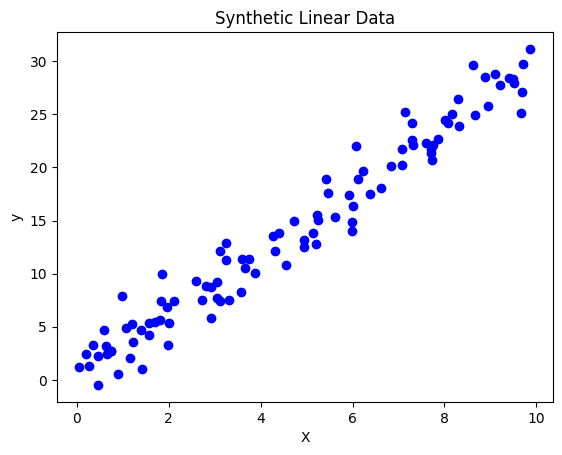

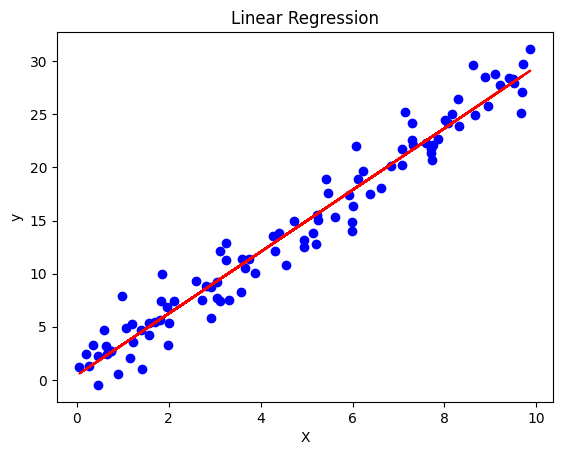

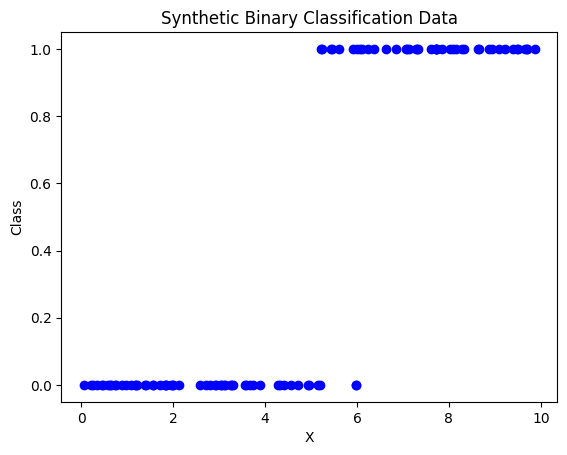

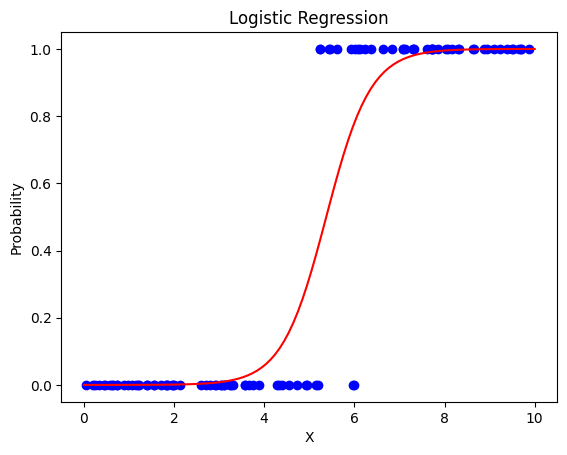

Accuracy: 0.96


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic linear data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X + np.random.randn(100, 1) * 2

# Create a scatter plot of the data
plt.scatter(X, y, color='blue')
plt.title("Synthetic Linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Plot the linear regression line
plt.scatter(X, y, color='blue')
plt.plot(X, linear_model.predict(X), color='red')
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Generate synthetic binary classification data
y_binary = (y > 15).astype(int).flatten()  # Classify based on a threshold of 15

# Create a scatter plot of the binary data
plt.scatter(X, y_binary, color='blue')
plt.title("Synthetic Binary Classification Data")
plt.xlabel("X")
plt.ylabel("Class")
plt.show()

# Fit a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X, y_binary)

# Plot the logistic regression sigmoid curve
X_range = np.linspace(0, 10, 100)
probs = logistic_model.predict_proba(X_range.reshape(-1, 1))[:, 1]
plt.plot(X_range, probs, color='red')
plt.scatter(X, y_binary, color='blue')
plt.title("Logistic Regression")
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

# Predict binary classes using the logistic regression model
y_pred = logistic_model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y_binary, y_pred)
print("Accuracy:", accuracy)
